<a href="https://colab.research.google.com/github/mel0ca/Traffic-Analysis/blob/main/IVT-Pattern-Across-App-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd
import requests
import io

url = "https://drive.google.com/uc?export=download&id=1WpE1HSREEt8I330uj2oa0V0OkzlUdELp"

response = requests.get(url)
response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

# Load the CSV into a pandas DataFrame directly from the response content
df = pd.read_csv(io.StringIO(response.text))

print("Loaded Data")
display(df.head())

Loaded Data


,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,2025-09-11 14:00:00,30836,30741,22,46383,1.504183,0,0,1.003090,1401.636364,0.0
1,2025-09-11 15:00:00,19164,19139,22,20418,1.065435,0,0,1.001306,871.090909,0.0
2,2025-09-11 16:00:00,21396,21365,22,22793,1.065293,0,0,1.001451,972.545455,0.0
3,2025-09-11 17:00:00,19608,19579,22,20881,1.064922,0,0,1.001481,891.272727,0.0
4,2025-09-11 18:00:00,20300,20262,22,21624,1.065222,0,0,1.001875,922.727273,0.0


Data Cleaning: Removing extra spaces

In [15]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

Date to datetime conversion

In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df.head()

,Total Data Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaT,1191603,1189884,28,1770702,1.485983,0,0,1.001445,42557.250000,0.004276
1,2025-09-11,93345,93340,22,99280,1.063581,0,0,1.000054,4242.954545,0.003456
2,2025-09-12,515646,515307,25,649515,1.259614,0,0,1.000658,20625.840000,0.003409
3,2025-09-13,406993,406729,25,473346,1.163032,0,0,1.000649,16279.720000,0.006033
4,2025-09-14,400917,400668,26,467152,1.165209,0,0,1.000621,15419.884620,0.003836


In [19]:
# Checking for Missing values
print(df.isnull().sum())

Date                    0
unique_idfas            0
unique_ips              0
unique_uas              0
total_requests          0
requests_per_idfa       0
impressions             0
impressions_per_idfa    0
idfa_ip_ratio           0
idfa_ua_ratio           0
IVT                     0
dtype: int64


In [21]:

# Checking for Non Null values and Datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  84 non-null     datetime64[ns]
 1   unique_idfas          84 non-null     int64         
 2   unique_ips            84 non-null     int64         
 3   unique_uas            84 non-null     int64         
 4   total_requests        84 non-null     int64         
 5   requests_per_idfa     84 non-null     float64       
 6   impressions           84 non-null     int64         
 7   impressions_per_idfa  84 non-null     int64         
 8   idfa_ip_ratio         84 non-null     float64       
 9   idfa_ua_ratio         84 non-null     float64       
 10  IVT                   84 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 7.3 KB
None


In [22]:
df.describe()

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
count,84,84.000000,84.000000,84.0,84.000000,84.000000,84.0,84.0,84.000000,84.000000,84.000000
mean,2025-09-13 07:29:59.999999744,14415.107143,14395.154762,22.0,15466.750000,1.061711,0.0,0.0,1.001152,655.232143,0.004050
min,2025-09-11 14:00:00,1125.000000,1125.000000,22.0,1133.000000,1.007111,0.0,0.0,1.000000,51.136364,0.000000
25%,2025-09-12 10:45:00,10473.000000,10462.000000,22.0,11231.500000,1.050261,0.0,0.0,1.000754,476.045455,0.000000
50%,2025-09-13 07:30:00,15506.000000,15483.000000,22.0,16426.000000,1.062600,0.0,0.0,1.001256,704.818182,0.000000
75%,2025-09-14 04:15:00,19639.250000,19611.250000,22.0,20915.250000,1.068580,0.0,0.0,1.001514,892.693182,0.005978
max,2025-09-15 01:00:00,30836.000000,30741.000000,22.0,46383.000000,1.504183,0.0,0.0,1.003090,1401.636364,0.040000
std,NaN,6430.028440,6416.179296,0.0,7446.789742,0.051964,0.0,0.0,0.000627,292.274020,0.006971


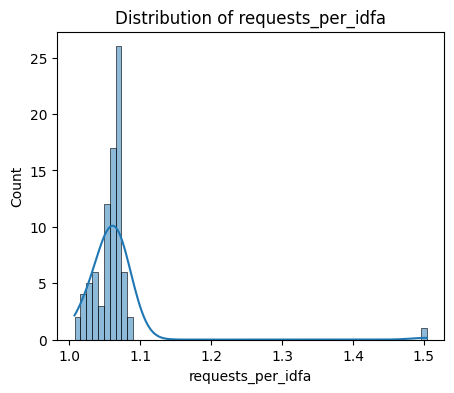

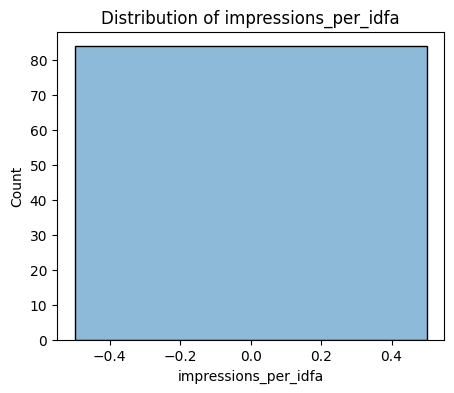

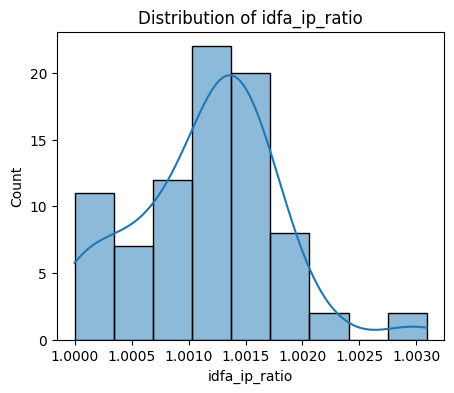

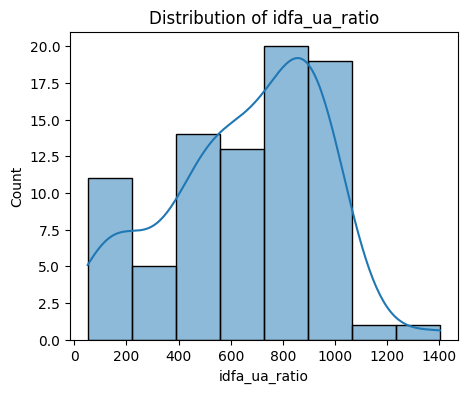

In [38]:
parameters = ['requests_per_idfa', 'impressions_per_idfa', 'idfa_ip_ratio', 'idfa_ua_ratio']

for i in parameters:
    plt.figure(figsize=(5,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

# Observations
* Requests per Unique Device : The average number of requests per unique device is consistently close to 1, which is indicative of normal, healthy user behavior where each device makes a typical volume of requests.

* Device-to-IP Ratio : The ratio of unique devices to unique IP addresses is also consistently close to 1. This suggests a straightforward relationship between devices and IP addresses, which is considered a normal pattern in traffic data.

* Device-to-User Agent Ratio : The patterns observed in the IDFA-to-User Agent ratio suggest that in certain periods or segments, a high number of unique devices share the same or similar User Agents. This could indicate localized traffic with similar app usage or device configurations among users in that area.
As the ip is not clustered around in a specific area we can conclude this as an exception.

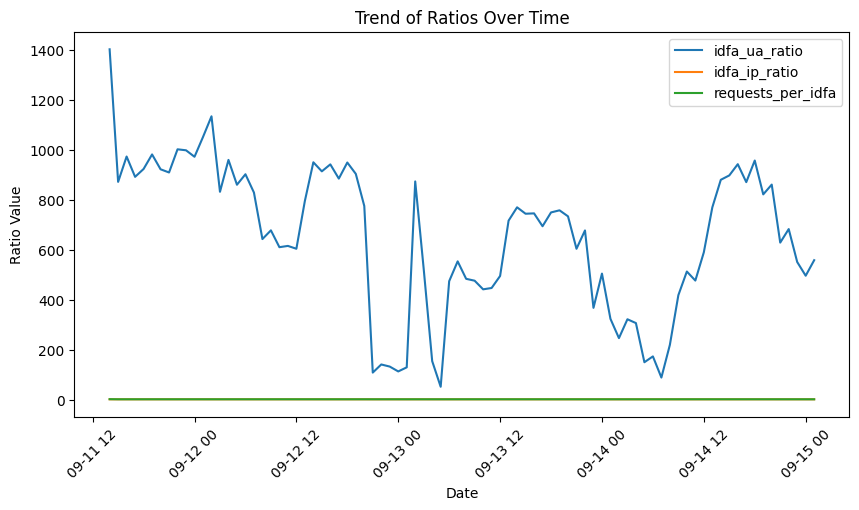

In [25]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['idfa_ua_ratio'], label='idfa_ua_ratio')
plt.plot(df['Date'], df['idfa_ip_ratio'], label='idfa_ip_ratio')
plt.plot(df['Date'], df['requests_per_idfa'], label='requests_per_idfa')
plt.legend()
plt.title("Trend of Ratios Over Time")
plt.xlabel("Date")
plt.ylabel("Ratio Value")
plt.xticks(rotation=45)
plt.show()

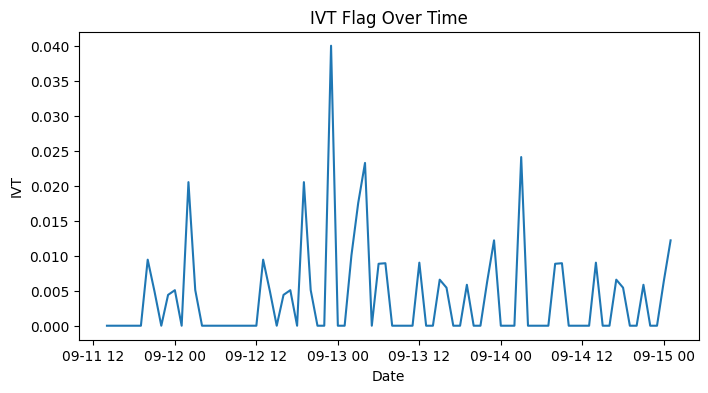

In [26]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Date', y='IVT')
plt.title("IVT Flag Over Time")
plt.show()

* IVT Flag Trend: The trend of the IVT flag over time appears to follow a diurnal (day/night) pattern, increasing during the day and decreasing at night. Based on this observation, the fluctuations do not present as abnormal behavior within this dataset.

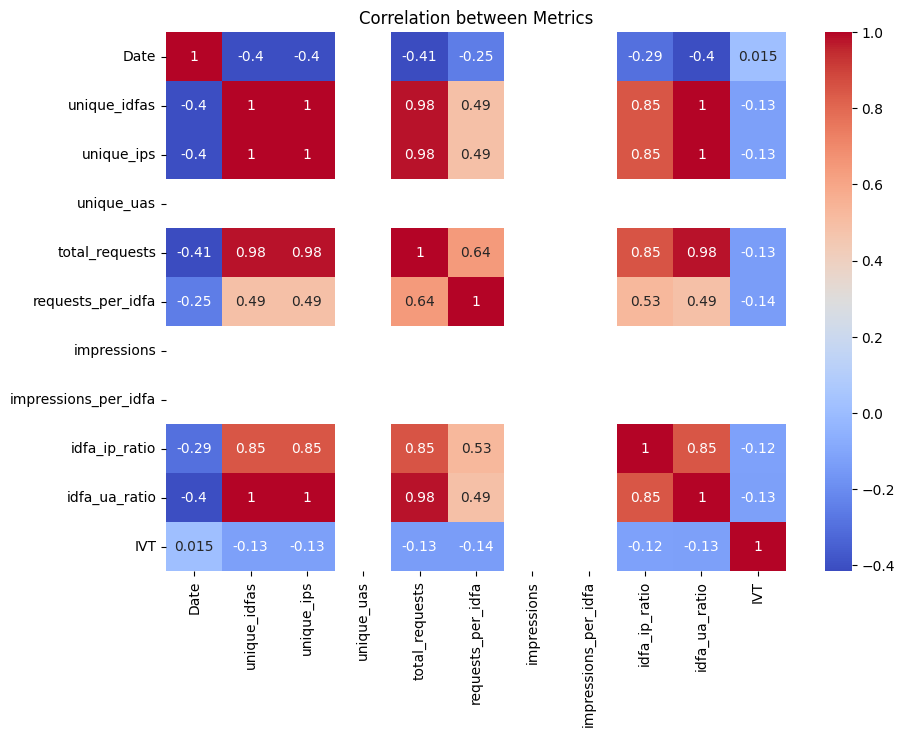

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Metrics")
plt.show()

### Graph-Based Insights

* Requests per IDFA: Mostly stable (~1), minor variations.
* Impressions per IDFA: Flat at 0 -> indicates fake or unserved requests.
* IDFA-IP Ratio: ~1 across apps -> normal, not a IVT factor.
* IDFA-UA Ratio: Shows large spikes in IVT apps but due to no ip clustering it can be dismissed
* IVT Trend: Fluctuates w.r.t day/night

##### Conclusion

Our analysis which shows patterns consistent with normal behavior in key areas like requests per device and device-to-IP ratios, we can conclude that this app's traffic, as represented in this dataset, is not exhibiting patterns indicative of invalid traffic. While the IDFA-to-User Agent ratio shows variations that might warrant further investigation for operational understanding, and the IVT flag follows a diurnal pattern, these do not, in this context, suggest abnormal or invalid traffic behavior.